In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython
class TestJuliaSet:
    def test_sum(self):
        cs, zs = self.gen_var()
        max_iterations = 300
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == 33219980
    def gen_var(self):
        desired_width = 1000
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -.42193
        """Create a list of complex coordinates (zs) and complex parameters (cs),
        build Julia set"""
        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width
        x = []
        y = []
        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step
        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step
        # build a list of coordinates and the initial condition for each cell.
        # Note that our initial condition is a constant and could easily be removed,
        # we use it to simulate a real-world scenario with several inputs to our
        # function
        zs = []
        cs = []
        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))
        return cs, 
    
    
    
    

(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py  
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 1 item                                                                                   

test_JuliaSet.py .                                                                           [100%]

======================================== 1 passed in 2.31s =========================================

#Task 1.2: 

In [ ]:
import pytest
from JuliaSetSecond import calculate_z_serial_purepython

class TestJuliaSet:
    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
        assert sum(output) == expected_sum

    def gen_var(self, desired_width):
        x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
        c_real, c_imag = -0.62772, -0.42193

        x_step = (x2 - x1) / desired_width
        y_step = (y1 - y2) / desired_width

        x = []
        y = []

        ycoord = y2
        while ycoord > y1:
            y.append(ycoord)
            ycoord += y_step

        xcoord = x1
        while xcoord < x2:
            x.append(xcoord)
            xcoord += x_step

        zs = []
        cs = []

        for ycoord in y:
            for xcoord in x:
                zs.append(complex(xcoord, ycoord))
                cs.append(complex(c_real, c_imag))

        return cs, zs


(myenv) erik@MBPsomthorErik3 Assignment 2 % pytest test_JuliaSet.py
======================================= test session starts ========================================
platform darwin -- Python 3.11.3, pytest-8.3.4, pluggy-1.5.0
rootdir: /Users/erik/Desktop/Intro-to-high-performance-computing-group-11/Assignment 2
plugins: anyio-4.2.0
collected 2 items                                                                                  

test_JuliaSet.py .F                                                                          [100%]

============================================= FAILURES =============================================
______________________________ TestJuliaSet.test_sum[200-500-8309980] ______________________________

self = <test_JuliaSet.TestJuliaSet object at 0x1010788d0>, max_iterations = 200, desired_width = 500
expected_sum = 8309980

    @pytest.mark.parametrize(
        "max_iterations, desired_width, expected_sum",
        [
            (300, 1000, 33219980),  # Example: original test case
            (200, 500, 8309980)   # Example: idk what to put to make it work
        ]
    )
    def test_sum(self, max_iterations, desired_width, expected_sum):
        cs, zs = self.gen_var(desired_width)
        output = calculate_z_serial_purepython(max_iterations, zs, cs)
>       assert sum(output) == expected_sum
E       assert 5798200 == 8309980
E        +  where 5798200 = sum([0, 0, 0, 0, 0, 0, ...])

test_JuliaSet.py:15: AssertionError
--------------------------------------- Captured stdout call ---------------------------------------
@timefn: calculate_z_serial_purepython took 0.36625333299161866 seconds
===================================== short test summary info ======================================
FAILED test_JuliaSet.py::TestJuliaSet::test_sum[200-500-8309980] - assert 5798200 == 8309980
=================================== 1 failed, 1 passed in 2.72s ====================================

## Exercise 3

Advantages: It lets me step through my code line by line, so I can see exactly where things go wrong. I can also inspect variables at different points, which helps a lot with figuring out unexpected behavior. It’s much faster than just printing everything out and guessing where the issue is.  

Disadvantages: The command-line interface of `pdb` isn’t beginner-friendly. Remembering all the commands took a lot of effort, and sometimes I had to restart my debugging session when I messed up. It doesn’t have a GUI, so it’s not as intuitive as visual debuggers like those in PyCharm or VS Code, where you can set breakpoints and see variable values more easily.

# Bonus Exercise

## Task B.1 

Check the code with a linter, and in case, run an auto-formatter. Produce HTML documentation running sphinx.

In [2]:
!flake8 conway_perf.py

conway_perf.py:2:10: W291 trailing whitespace
conway_perf.py:9:1: F401 'sys' imported but unused
conway_perf.py:9:11: E401 multiple imports on one line
conway_perf.py:11:1: F401 'matplotlib.pyplot as plt' imported but unused
conway_perf.py:12:1: F401 'matplotlib.animation' imported but unused
conway_perf.py:28:11: E203 whitespace before ':'
conway_perf.py:28:22: E203 whitespace before ':'
conway_perf.py:57:11: E203 whitespace before ':'
conway_perf.py:57:23: E203 whitespace before ':'


In [3]:
!black conway_perf.py


All done! ✨ 🍰 ✨
1 file left unchanged.


See docs/build/html for HTML documentation generated using sphinx

## Task B.2

The iteration is fixed to 100

Grid size: 10x10, Execution time: 0.014580 seconds
Grid size: 20x20, Execution time: 0.058829 seconds
Grid size: 30x30, Execution time: 0.128271 seconds
Grid size: 40x40, Execution time: 0.218789 seconds
Grid size: 50x50, Execution time: 0.364365 seconds
Grid size: 60x60, Execution time: 0.526757 seconds
Grid size: 70x70, Execution time: 0.712879 seconds
Grid size: 80x80, Execution time: 0.929244 seconds
Grid size: 90x90, Execution time: 1.204439 seconds
Grid size: 100x100, Execution time: 1.474283 seconds


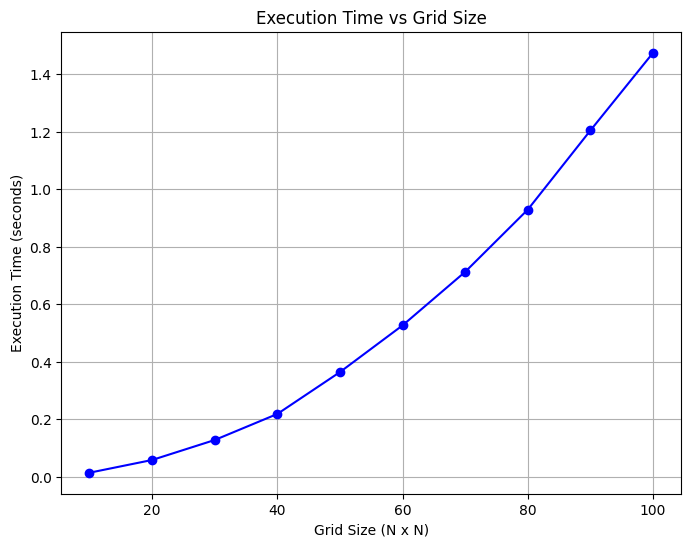

In [10]:
import subprocess
import matplotlib.pyplot as plt

def run_program(grid_size):
    command = ["python", "conway_perf.py", "--grid-size", str(grid_size), "--iterations", "100"]
    
    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr


iteration = 5
grid_sizes = range(10, 101, 10)
execution_times = []
for size in grid_sizes:
    stdout, stderr = run_program(size)
    if stderr:
        print("Error:", stderr)
    else:
        time_taken = float(stdout.strip().split()[-1])  # Assuming last output is execution time
        print(f"Grid size: {size}x{size}, Execution time: {time_taken:.6f} seconds")
    execution_times.append(time_taken)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time vs Grid Size")
plt.grid(True)
plt.show()

## Task B.3
### Before optimization

#### Total Execution Time

In [13]:
!time python3 conway_perf_optimize.py

Time:  0.012295874999836087
python3 conway_perf_optimize.py  0.20s user 0.03s system 98% cpu 0.226 total


#### Line profiler

In [34]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m kernprof -l conway_perf.py

Time:  4.73496245899878
Wrote profile results to conway_perf.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "conway_perf.py.lprof"


In [35]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m line_profiler -rmt "conway_perf.py.lprof"

Timer unit: 1e-06 s

Total time: 0 s
File: conway_perf.py
Function: addGlider at line 24

Line #      Hits         Time  Per Hit   % Time  Line Contents
    24                                           @profile
    25                                           def addGlider(i, j, grid):
    26                                               """adds a glider with top left cell at (i, j)"""
    27                                               glider = np.array([[0, 0, 255], [255, 0, 255], [0, 255, 255]])
    28                                               grid[i : i + 3, j : j + 3] = glider

Total time: 0 s
File: conway_perf.py
Function: addGosperGliderGun at line 30

Line #      Hits         Time  Per Hit   % Time  Line Contents
    30                                           @profile
    31                                           def addGosperGliderGun(i, j, grid):
    32                                               """adds a Gosper Glider Gun with top left cell at (i, j)"""
    33  

In [18]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m memory_profiler conway_perf.py

Time:  334.35222291600076
Filename: conway_perf.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    19   85.672 MiB   85.672 MiB           1   @profile
    20                                         def randomGrid(N):
    21                                             """returns a grid of NxN random values"""
    22   88.266 MiB    2.594 MiB           1       return np.random.choice(vals, N * N, p=[0.2, 0.8]).reshape(N, N)


Filename: conway_perf.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    59   88.469 MiB 8839.172 MiB         100   @profile
    60                                         def update(grid, N):
    61                                             # copy grid since we require 8 neighbors for calculation
    62                                             # and we go line by line
    63   88.469 MiB    0.109 MiB         100       newGrid = grid.copy()
    64   88.469 MiB    0.000 MiB       10100       for i in range(N):
    65   88.46

In [14]:
!python -m cProfile -s cumulative conway_perf.py --grid-size=100 --iterations=100

Time:  0.7268158749993745
         1181631 function calls (1164671 primitive calls) in 1.109 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    339/1    0.001    0.000    1.109    1.109 {built-in method builtins.exec}
        1    0.000    0.000    1.109    1.109 conway_perf.py:1(<module>)
        1    0.000    0.000    0.727    0.727 conway_perf.py:94(main)
      100    0.711    0.007    0.711    0.007 conway_perf.py:60(update)
       39    0.001    0.000    0.526    0.013 __init__.py:1(<module>)
    393/6    0.001    0.000    0.397    0.066 <frozen importlib._bootstrap>:1349(_find_and_load)
    389/6    0.001    0.000    0.397    0.066 <frozen importlib._bootstrap>:1304(_find_and_load_unlocked)
    375/7    0.000    0.000    0.396    0.057 <frozen importlib._bootstrap>:911(_load_unlocked)
    324/7    0.000    0.000    0.396    0.057 <frozen importlib._bootstrap_external>:989(exec_module)
   916/13    0.000    0.000   

## Task B.4
### After optimization

#### Total Execution Time

In [27]:
!time python3 conway_perf_optimize.py

Time:  0.012091041004168801
python3 conway_perf_optimize.py  0.20s user 0.02s system 98% cpu 0.226 total


In [10]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m kernprof -l conway_perf_optimize.py

Time:  0.015638791999663226
Wrote profile results to conway_perf_optimize.py.lprof
Inspect results with:
python3 -m line_profiler -rmt "conway_perf_optimize.py.lprof"


In [11]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m line_profiler -rmt "conway_perf_optimize.py.lprof"

Timer unit: 1e-06 s

Total time: 0.004915 s
File: conway_perf_optimize.py
Function: randomGrid at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           @profile
    20                                           def randomGrid(N):
    21                                               """returns a grid of NxN random values"""
    22         1       4915.0   4915.0    100.0      return np.random.choice(vals, (N, N), p=[0.2, 0.8])

Total time: 0.009735 s
File: conway_perf_optimize.py
Function: update at line 59

Line #      Hits         Time  Per Hit   % Time  Line Contents
    59                                           @profile
    60                                           def update(grid, N):
    61                                               # copy grid since we require 8 neighbors for calculation
    62                                               # and we go line by line
    63       100          9.0      0.1    

In [9]:
# Before running line profiler and memory profiler,
# make sure to add @profile above the functions you want to analyze in the code.
!python3 -m memory_profiler conway_perf_optimize.py

Time:  0.10641004100034479
Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    19   86.438 MiB   86.438 MiB           1   @profile
    20                                         def randomGrid(N):
    21                                             """returns a grid of NxN random values"""
    22   88.984 MiB    2.547 MiB           1       return np.random.choice(vals, (N, N), p=[0.2, 0.8])


Filename: conway_perf_optimize.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    59   89.156 MiB 8912.547 MiB         100   @profile
    60                                         def update(grid, N):
    61                                             # copy grid since we require 8 neighbors for calculation
    62                                             # and we go line by line
    63   89.156 MiB    0.000 MiB         100       neighbors = (
    64   89.156 MiB    0.016 MiB         800           np.roll(grid, shift=1, axis=0) 

In [15]:
!python -m cProfile -s cumulative conway_perf_optimize.py --grid-size=100 --iterations=100

Time:  0.02579137500106299
         1188130 function calls (1171170 primitive calls) in 0.396 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       39    0.001    0.000    0.515    0.013 __init__.py:1(<module>)
    339/1    0.001    0.000    0.396    0.396 {built-in method builtins.exec}
        1    0.000    0.000    0.396    0.396 conway_perf_optimize.py:1(<module>)
    393/6    0.001    0.000    0.386    0.064 <frozen importlib._bootstrap>:1349(_find_and_load)
    389/6    0.001    0.000    0.386    0.064 <frozen importlib._bootstrap>:1304(_find_and_load_unlocked)
    375/7    0.000    0.000    0.385    0.055 <frozen importlib._bootstrap>:911(_load_unlocked)
    324/7    0.000    0.000    0.385    0.055 <frozen importlib._bootstrap_external>:989(exec_module)
   916/13    0.000    0.000    0.383    0.029 <frozen importlib._bootstrap>:480(_call_with_frames_removed)
   425/11    0.000    0.000    0.360    0.033 {built-in

[Original] Grid size: 10x10, Execution time: 0.011909 seconds
[Optimized] Grid size: 10x10, Execution time: 0.008066 seconds
[Original] Grid size: 20x20, Execution time: 0.033091 seconds
[Optimized] Grid size: 20x20, Execution time: 0.007302 seconds
[Original] Grid size: 30x30, Execution time: 0.065633 seconds
[Optimized] Grid size: 30x30, Execution time: 0.007698 seconds
[Original] Grid size: 40x40, Execution time: 0.115546 seconds
[Optimized] Grid size: 40x40, Execution time: 0.008042 seconds
[Original] Grid size: 50x50, Execution time: 0.176735 seconds
[Optimized] Grid size: 50x50, Execution time: 0.009162 seconds
[Original] Grid size: 60x60, Execution time: 0.252715 seconds
[Optimized] Grid size: 60x60, Execution time: 0.009100 seconds
[Original] Grid size: 70x70, Execution time: 0.339238 seconds
[Optimized] Grid size: 70x70, Execution time: 0.009759 seconds
[Original] Grid size: 80x80, Execution time: 0.444132 seconds
[Optimized] Grid size: 80x80, Execution time: 0.010789 seconds


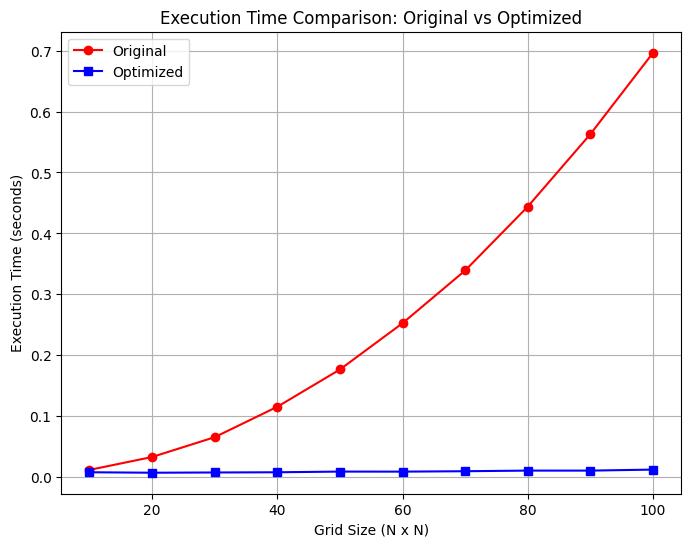

In [5]:
import subprocess
import matplotlib.pyplot as plt

def run_program(script_name, grid_size):
    command = ["python", script_name, "--grid-size", str(grid_size), "--iterations", "100"]

    result = subprocess.run(command, capture_output=True, text=True)
    return result.stdout, result.stderr

iteration = 5
grid_sizes = range(10, 101, 10)
execution_times_original = []
execution_times_optimized = []

for size in grid_sizes:
    stdout, stderr = run_program("conway_perf.py", size)
    if stderr:
        print(f"[Original] Error for grid size {size}: {stderr}")
    else:
        time_taken_original = float(stdout.strip().split()[-1])
        print(f"[Original] Grid size: {size}x{size}, Execution time: {time_taken_original:.6f} seconds")
        execution_times_original.append(time_taken_original)

    # 运行 conway_perf_optimize.py
    stdout, stderr = run_program("conway_perf_optimize.py", size)
    if stderr:
        print(f"[Optimized] Error for grid size {size}: {stderr}")
    else:
        time_taken_optimized = float(stdout.strip().split()[-1])
        print(f"[Optimized] Grid size: {size}x{size}, Execution time: {time_taken_optimized:.6f} seconds")
        execution_times_optimized.append(time_taken_optimized)

plt.figure(figsize=(8, 6))
plt.plot(grid_sizes, execution_times_original, marker='o', linestyle='-', color='r', label="Original")
plt.plot(grid_sizes, execution_times_optimized, marker='s', linestyle='-', color='b', label="Optimized")
plt.xlabel("Grid Size (N x N)")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison: Original vs Optimized")
plt.legend()
plt.grid(True)
plt.show()
